In [1]:
# Zaimportowanie bibliotek
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import signal

In [2]:
# Wczytanie pliku CSV
df = pd.read_csv('brush_hair_22_4.csv', names=['Acc_X', 'Acc_Y', 'Acc_Z'])

# Przeskalowanie danych
df['Acc_X'] = df['Acc_X'] / 64
df['Acc_Y'] = df['Acc_Y'] / 64
df['Acc_Z'] = df['Acc_Z'] / 64

# Dodanie kolumny Acc będącej wartością wypadkową przyśpieszeń w osi X, Y i Z
df['Acc'] = np.sqrt(df['Acc_X']**2 + df['Acc_Y']**2 + df['Acc_Z']**2)

# Wyświetlenie pierwszych 5 wierszy przeskalowanych danych
print(df.head())

      Acc_X     Acc_Y     Acc_Z       Acc
0  0.734375 -0.812500 -0.687500  1.293104
1  0.781250 -0.812500 -0.656250  1.304290
2  0.843750 -0.796875 -0.656250  1.333262
3  0.937500 -0.750000 -0.515625  1.306627
4  0.984375 -0.812500 -0.328125  1.317883


In [3]:
def dataframe_to_arrays(df):
    # Przekształcanie kolumn do postaci tablic numpy
    Acc_X = df['Acc_X'].to_numpy()
    Acc_Y = df['Acc_Y'].to_numpy()
    Acc_Z = df['Acc_Z'].to_numpy()
    Acc = df['Acc'].to_numpy()

    return Acc_X, Acc_Y, Acc_Z, Acc

# Użycie funkcji
Acc_X, Acc_Y, Acc_Z, Acc = dataframe_to_arrays(df)

# Wyświetlenie wyników
print(f"Acc_X: {Acc_X}")
print(f"Acc_Y: {Acc_Y}")
print(f"Acc_Z: {Acc_Z}")
print(f"Acc: {Acc}")

Acc_X: [ 0.734375  0.78125   0.84375   0.9375    0.984375  0.859375  0.6875
  0.40625   0.46875   0.40625   0.640625  0.203125  0.125     0.328125
  0.109375  0.5625    0.671875  0.328125  0.390625  0.46875   0.265625
  0.546875  0.484375  0.546875  0.609375  0.609375  0.65625   0.625
  0.78125   0.90625   0.453125  0.265625  0.359375 -0.0625   -0.015625
 -0.171875 -0.5      -0.828125  0.859375  1.421875  0.90625   0.859375
  0.4375    0.640625  0.75      0.578125  0.328125  0.4375    0.640625
  1.015625  0.953125  0.828125  0.890625  0.859375  0.390625 -0.0625
  0.5       0.15625  -0.03125   0.4375    0.265625 -0.40625  -0.375
  0.        0.65625   0.421875 -0.34375   0.171875 -0.078125 -0.21875
 -0.28125  -0.328125 -0.328125 -0.40625  -0.421875 -0.5      -0.203125
 -0.375    -0.53125  -0.1875   -0.53125  -0.59375  -0.765625 -0.171875
  0.09375  -0.46875  -0.34375   0.0625   -0.21875  -0.171875  0.015625
 -0.234375 -0.09375  -0.265625 -0.234375 -0.109375  0.71875   1.59375
  1.984375 

In [6]:
def zero_elements_below_threshold(*arrays, threshold=0.5):
    # Przejście przez wszystkie tablice
    for array in arrays:
        # Przejście przez wszystkie elementy w tablicy
        for i in range(len(array)):
            # Sprawdzenie, czy wartość elementu jest mniejsza lub równa progu
            if array[i] <= threshold:
                # Zerowanie elementu
                array[i] = 0

# Użycie funkcji
zero_elements_below_threshold(Acc_X, Acc_Y, Acc_Z, Acc, threshold=0.5)

# Wyświetlenie pierwszych 5 wierszy przeskalowanych danych
print(df.head())

      Acc_X  Acc_Y  Acc_Z       Acc  Acc_X_Gust
0  0.734375    0.0    0.0  1.293104    0.899052
1  0.781250    0.0    0.0  1.304290    0.903027
2  0.843750    0.0    0.0  1.333262    0.886299
3  0.937500    0.0    0.0  1.306627    0.838770
4  0.984375    0.0    0.0  1.317883    0.755620


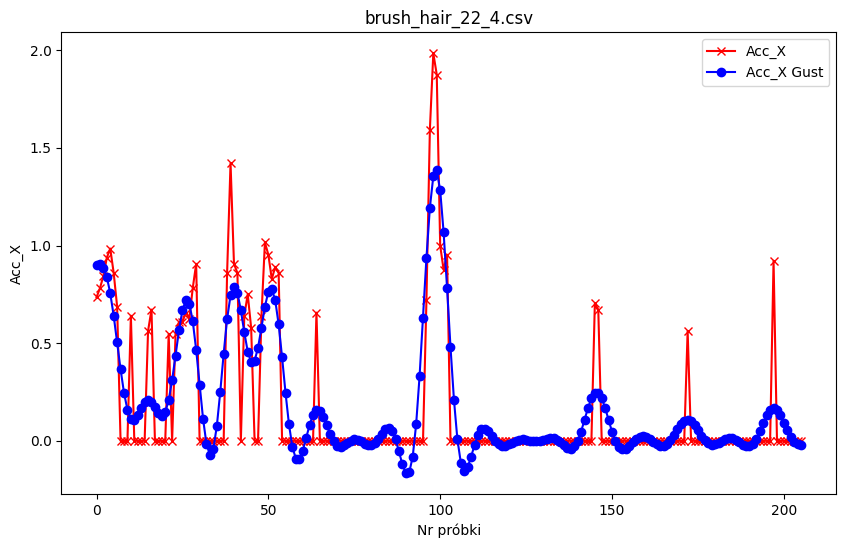

In [5]:
# Tworzenie wykresu
def filter_signal(signal_data):
    # Wyznaczanie parametrów filtru
    b, a = signal.ellip(4, 0.01, 120, 0.125)
    
    # Zastosowanie filtru do danych
    filtered_signal = signal.filtfilt(b, a, signal_data, method="gust")
    
    return filtered_signal

# Użycie funkcji do filtracji sygnału z osi X
df['Acc_X_Gust'] = filter_signal(df['Acc_X'])

# Tworzenie wykresu
plt.figure(figsize=(10,6))
plt.plot(df['Acc_X'], label='Acc_X', color='red', marker='x', markevery=1)
plt.plot(df['Acc_X_Gust'], label='Acc_X Gust', color='blue', marker='o', markevery=1)
plt.title('brush_hair_22_4.csv')
plt.xlabel('Nr próbki')
plt.ylabel('Acc_X')
plt.legend()
plt.show()